# Workshop 4: Orbits and Stability

In [3]:
import scipy         # Another numerical library
from scipy import integrate

import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

### A Star and a Planet
As a warm-up example, let us consider a two-body problem of a planet and a star held together by the force of gravity.

The position of the star will be given by $\mathbf{R} = (X, Y)$ and that of the planet is $\mathbf{r} = (x,y)$. The masses are $M$ and $m$, respectively. From this, the force of the planet onto the star is

$$
\mathbf{F}_\mathrm{P\,on\,S} = \frac{GMm}{\left|\mathbf{r} - \mathbf{R}\right|^3}\left(\mathbf{r} - \mathbf{R}\right)\,.
$$

Likewise, the force of the star on the planet is

$$
\mathbf{F}_\mathrm{S\,on\,P} = \frac{GMm}{\left|\mathbf{r} - \mathbf{R}\right|^3}\left(\mathbf{R} - \mathbf{r}\right)\,.
$$

As we discussed before, it's best not to have overly big numbers floating around. Hence, we express $M$ in units of the solar mass and $m$ in Earth masses: $M = N M_\odot$, $m = n M_\oplus$. We also use astronomical units to express the distance so that $\mathbf{R} = \mathbf{D}\times \mathrm{au}$ and $\mathbf{r} = \mathbf{d}\times \mathrm{au}$. This sets the forces to

$$
\mathbf{F}_\mathrm{P\,on\,S} = \frac{GM_\odot M_\oplus}{\mathrm{au}^2}\frac{Nn}{\left|\mathbf{d} - \mathbf{D}\right|^3}\left(\mathbf{d} - \mathbf{D}\right)\,.
$$


From Newton's second law, the accelerations that the planet and the star experience are

$$
\mathbf{a}_P = \frac{GM_\odot}{\mathrm{au}^2}\frac{N}{\left|\mathbf{d} - \mathbf{D}\right|^3}\left(\mathbf{D} - \mathbf{d}\right)\approx 0.006\frac{N}{\left|\mathbf{d} - \mathbf{D}\right|^3}\left(\mathbf{D} - \mathbf{d}\right)\,,
\\
\mathbf{a}_S = \frac{G M_\oplus}{\mathrm{au}^2}\frac{n}{\left|\mathbf{d} - \mathbf{D}\right|^3}\left(\mathbf{d} - \mathbf{D}\right) \approx 1.78\times 10^{-8}\frac{n}{\left|\mathbf{d} - \mathbf{D}\right|^3}\left(\mathbf{d} - \mathbf{D}\right)\,.
$$

We can see that the acceleration experienced by the star is much smaller than that of the planet. Therefore, we can assume that the star does not move as the planet goes around it. Therefore, we write

$$
\ddot{\mathbf{r}}_P = \mathrm{au}\times \ddot{\mathbf{d}}= \frac{GM_\odot}{\mathrm{au}^2}\frac{N}{\left|\mathbf{d} \right|^3}\left( - \mathbf{d}\right)\,,
\\
\ddot{\mathbf{d}}= \frac{GM_\odot}{\mathrm{au}^3}\frac{N}{\left|\mathbf{d} \right|^3}\left( - \mathbf{d}\right)\approx 
3.965\times 10^{-14}\frac{N}{\left|\mathbf{d} \right|^3}\left( - \mathbf{d}\right)\,,
$$
where the units of $3.965\times 10^{-14}$ are $s^{-2}$. Alternatively, it can be rewritten as $3\times 10^{-4}
\,\mathrm{day}^{-2}$.

As before, in order to solve the initial value problem, we need to write it down as a first-order differential equation:

$$
\frac{d}{dt}
\begin{pmatrix}
x
\\
y
\\
v_x
\\
v_y
\end{pmatrix}
=
\begin{pmatrix}
v_x
\\
v_y
\\
\mathbf{a}_P\cdot \hat{x}
\\
\mathbf{a}_P\cdot \hat{y}
\end{pmatrix}
$$

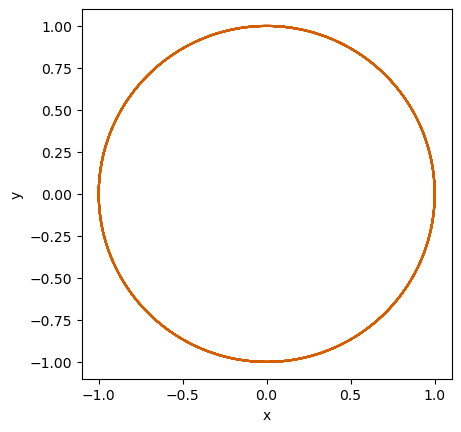

In [11]:
# Parameters
t_min = 0
t_max = 6 * 365.25
M = 1

initial_state = [1, 0, 0, 2 * np.pi / 365.25]

# Functions
d = -2.96 * 10**(-4)
def Derivative(t, current_state):
    x = current_state[0]
    y = current_state[1]
    vx = current_state[2]
    vy = current_state[3]
    R = np.sqrt(x**2 + y**2)
    
    return [vx, vy, M * d * x / R**3, M * d * y / R**3]

# Solution
solution = scipy.integrate.solve_ivp(Derivative, [t_min,t_max], initial_state, max_step = 0.1)
                                     # max_step=0.01)
# , max_step = .011
# Plot
time = solution.t
x = (solution.y)[0]
y = (solution.y)[1]


fig, ax = plt.subplots(1, 1)

ax.plot(x, y, color = CF_vermillion)     
ax.set(xlabel = "x", ylabel = "y")
plt.gca().set_aspect('equal')


### Two Stars

Next, we look at a two-star system. Here, the position of one of them is $\mathbf{R} = (X, Y)$ and that of the other one is $\mathbf{r} = (x,y)$. The masses are $M$ and $m$, respectively.

Expressing the masses in $M_\odot$ gives

$$
\ddot{\mathbf{d}} \approx 
3\times 10^{-4}\frac{N}{\left|\mathbf{d} - \mathbf{D} \right|^3}\left(\mathbf{D} - \mathbf{d}\right)\,,
\\
\ddot{\mathbf{D}} \approx 
3\times 10^{-4}\frac{n}{\left|\mathbf{d} - \mathbf{D} \right|^3}\left(\mathbf{d} - \mathbf{D}\right)\,.
$$

Plot several different orbits.

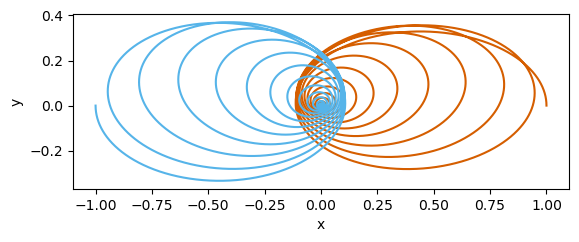

In [32]:
# Parameters
t_min = 0
t_max = 5*365.25
M1 = 1.0
M2 = 1.05

initial_state = [1, 0, 0, 1  / 365.25, -1, 0, 0, -1 / 365.25]

# Functions
d = -2.96 * 10**(-4)
def Derivative(t, current_state):
    x1 = current_state[0]
    y1 = current_state[1]
    vx1 = current_state[2]
    vy1 = current_state[3]

    x2 = current_state[4]
    y2 = current_state[5]
    vx2 = current_state[6]
    vy2 = current_state[7]

    R = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    
    return [vx1, vy1, M2 * d * x1 / R**3, M2 * d * y1 / R**3,
            vx2, vy2, M1 * d * x2 / R**3, M1 * d * y2 / R**3]

# Solution
solution = scipy.integrate.solve_ivp(Derivative, [t_min,t_max], initial_state, max_step=0.1)
# , max_step = .011
# Plot
time = solution.t
x1 = (solution.y)[0]
y1 = (solution.y)[1]

x2 = (solution.y)[4]
y2 = (solution.y)[5]

fig, ax = plt.subplots(1, 1)

ax.plot(x1, y1, color = CF_vermillion)     
ax.plot(x2, y2, color = CF_sky)     
ax.set(xlabel = "x", ylabel = "y")
plt.gca().set_aspect('equal')
